<a href="https://colab.research.google.com/github/Oddjobsss/mobile-_data_analysis/blob/main/MobileUsageAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
from faker import Faker


# Step 1: Setup
fake = Faker()
users = ['U001', 'U002', 'U003', 'U004', 'U005']
apps = ['YouTube', 'WhatsApp', 'Instagram', 'Facebook', 'Snapchat']
data = []

# Step 2: Generate random data
for _ in range(1000):
    user = random.choice(users)
    date = fake.date_between(start_date='-30d', end_date='today')
    call = random.randint(0, 60)
    data_used = random.randint(100, 3000)
    sms = random.randint(0, 10)
    recharge = random.choice([0, 149, 199, 249])
    top_apps = ', '.join(random.sample(apps, 2))
    hour = random.randint(0, 23)
    location = "Kolkata"

    data.append([user, date, call, data_used, sms, recharge, top_apps, hour, location])

# Step 3: Create DataFrame
df = pd.DataFrame(data, columns=[
    'User_ID', 'Date', 'Call_Minutes', 'Data_Used_MB',
    'SMS_Count', 'Recharge_Amount', 'Top_Apps', 'Hour', 'Location'
])
df['Date'] = pd.to_datetime(df['Date'])

# Step 4: Save dataset
df.to_csv('mobile_usage.csv', index=False)




In [ ]:
# Extract month
df['Month'] = df['Date'].dt.month_name()

# Extract weekday
df['Weekday'] = df['Date'].dt.day_name()

# Filter by July
df_july = df[df['Date'].dt.month == 7]

# Time range
print(df['Date'].min(), df['Date'].max())


2025-06-21 00:00:00 2025-07-20 00:00:00


In [ ]:
print(df.head)


<bound method NDFrame.head of     User_ID       Date  Call_Minutes  Data_Used_MB  SMS_Count  \
0      U004 2025-06-22            13          1442          2   
1      U004 2025-06-28             9          2216          1   
2      U002 2025-07-11            19           895          6   
3      U004 2025-06-30            44          2591          2   
4      U003 2025-07-18            42          2897          2   
..      ...        ...           ...           ...        ...   
995    U004 2025-06-26            42          1687          6   
996    U005 2025-06-30             0           651          9   
997    U002 2025-07-17            50          1282          4   
998    U004 2025-07-20            49          1009          1   
999    U003 2025-07-19            39          2263          4   

     Recharge_Amount            Top_Apps  Hour Location Month   Weekday  
0                249   YouTube, Snapchat     8  Kolkata  June    Sunday  
1                199   YouTube, WhatsApp 

In [ ]:
print(df.dtypes)

User_ID                    object
Date               datetime64[ns]
Call_Minutes                int64
Data_Used_MB                int64
SMS_Count                   int64
Recharge_Amount             int64
Top_Apps                   object
Hour                        int64
Location                   object
dtype: object


In [ ]:

# STEP 3: Drop rows with missing or invalid values
df.dropna(inplace=True)

# STEP 4: Remove duplicates
df.drop_duplicates(inplace=True)

# STEP 5: Remove negative values if any (invalid for usage stats)
df = df[
    (df['Call_Minutes'] >= 0) &
    (df['Data_Used_MB'] >= 0) &
    (df['SMS_Count'] >= 0) &
    (df['Recharge_Amount'] >= 0) &
    (df['Hour'] >= 0) & (df['Hour'] <= 23)
]

# STEP 6: Strip and standardize text columns
df['User_ID'] = df['User_ID'].str.strip()
df['Top_Apps'] = df['Top_Apps'].str.title().str.strip()
df['Location'] = df['Location'].str.title().str.strip()

# STEP 7: Optional - create extra features
df['Weekday'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

# STEP 8: Save cleaned dataset
df.to_csv("cleaned_mobile_usage.csv", index=False)

In [ ]:
print(df.head())

  User_ID       Date  Call_Minutes  Data_Used_MB  SMS_Count  Recharge_Amount  \
0    U004 2025-06-22            13          1442          2              249   
1    U004 2025-06-28             9          2216          1              199   
2    U002 2025-07-11            19           895          6              149   
3    U004 2025-06-30            44          2591          2                0   
4    U003 2025-07-18            42          2897          2              199   

             Top_Apps  Hour Location Month   Weekday  
0   Youtube, Snapchat     8  Kolkata  June    Sunday  
1   Youtube, Whatsapp    20  Kolkata  June  Saturday  
2  Instagram, Youtube    13  Kolkata  July    Friday  
3   Whatsapp, Youtube     7  Kolkata  June    Monday  
4   Youtube, Whatsapp     5  Kolkata  July    Friday  


In [ ]:
df['Hour'] = pd.to_numeric(df['Hour'], errors='coerce')
df['Data_Used_MB'] = pd.to_numeric(df['Data_Used_MB'], errors='coerce')

df = df.dropna(subset=['Hour', 'Data_Used_MB'])


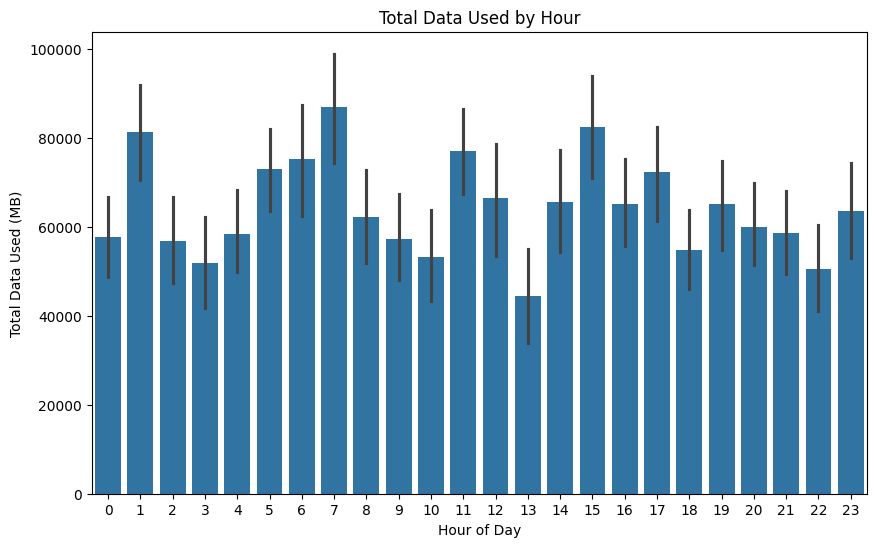

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Hour', y='Data_Used_MB', data=df, estimator=sum)
plt.title('Total Data Used by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Data Used (MB)')
plt.show()
